## Brazil-medical appointment show_noshow analysis

Udacity project
***Student-name- Nimish Bhushan***

Questions that I am trying to answer:-
    1. I will check for any data inconsistencies such as missing values or any logical error
    2. I will check the distribution of independent variables and how is it related to dependent variables using various
       visualization
    3. I will create few new columns in the data frame that might impact the model output and also perform EDA on these variables
    4. Lastly, I will use different classifiers to check for variable importance and also perform PCA to improve model performance

### Load packages

In [9]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
print(os.getcwd())
import sys

C:\Users\Nimish\Desktop\Python foundation


In [10]:
week_key = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### Load Data

We will load the data using pandas read_csv, making sure the encoding iss utf-8 and also print out the shape of data

In [11]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',encoding='utf8')

In [12]:
print("The shape of the DataFrame is => {}".format(df.shape))

The shape of the DataFrame is => (110527, 14)


### Describing data column types and checking for nulls in data frame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###  Rectify problem with data types of columns of data frame

Some major problems in the dataset:

1. PatientId is an Integer and not Float as it a random or sequential number generated by software
2. Data Type of ScheduledDay and AppointmentDay is datatime
3. Typo's in column names
4. Remove timestamp from appointment and schedule date

In [14]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [16]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Wrangling and Exploratory data analysis

In [17]:
print("Features in DataFrame = {}".format(df.columns.ravel()))

Features in DataFrame = ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age'
 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism'
 'Handicap' 'SMSReceived' 'NoShow']


There are 14 columns in total and the dependent variable is NoShow

We can drop patient id and appointmentID as they hold no significance in either predicting the outcome. Also, we are not interested in doing any EDA at patient level.

In [18]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

Let us check for unique values in each column and correct if any mismatch is found according to our understanding

In [19]:
print("Unique Values in `Gender` = {}".format(df['Gender'].unique()))
print("Unique Values in `Scholarship` = {}".format(df.Scholarship.unique()))
print("Unique Values in `Hypertension` = {}".format(df['Hypertension'].unique()))
print("Unique Values in `Diabetes` = {}".format(df['Diabetes'].unique()))
print("Unique Values in `Alcoholism` = {}".format(df['Alcoholism'].unique()))
print("Unique Values in `Handicap` = {}".format(df['Handicap'].unique()))
print("Unique Values in `SMSReceived` = {}".format(df['SMSReceived'].unique()))

Unique Values in `Gender` = ['F' 'M']
Unique Values in `Scholarship` = [0 1]
Unique Values in `Hypertension` = [1 0]
Unique Values in `Diabetes` = [0 1]
Unique Values in `Alcoholism` = [0 1]
Unique Values in `Handicap` = [0 1 2 3 4]
Unique Values in `SMSReceived` = [0 1]


We will change the type of few columns as per understanding

In [20]:
def type_changer(df,type2):
    return df.astype(type2)

df['Scholarship'] = type_changer(df['Scholarship'],'object')
df['Hypertension'] = type_changer(df['Hypertension'],'object')
df['Diabetes'] = type_changer(df['Diabetes'],'object')
df['Alcoholism'] = type_changer(df['Alcoholism'],'object')
df['Handicap'] = type_changer(df['Handicap'],'object')
df['SMSReceived'] = type_changer(df['SMSReceived'],'object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handicap          110527 non-null object
SMSReceived       110527 non-null object
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 10.1+ MB


In [21]:
# Check values for age column
print("Age = {}".format(np.sort(df['Age'].unique())))

Age = [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


We have patients with age 0 and -1 and also some very old patients

In [22]:
print("Patients with `Age`  (-1) = {}".format(df[df.Age == -1].shape[0]))
print("Patients with `Age` equal to 0 = {}".format(df[df.Age == 0].shape[0]))
print("Patients with `Age` greater than 100 = {}".format(df[df.Age >= 100].shape[0]))

Patients with `Age`  (-1) = 1
Patients with `Age` equal to 0 = 3539
Patients with `Age` greater than 100 = 11


There is only one patient with negative age hence this could be typo. We will delete this record. Also patients with age 0 could be new born babies. Few patients have age >=100 as well. Let us explore these patients and investigate further

In [23]:
df = df[df.Age >= 0]

As we have 3539 patients with `Age` equal to 0 we are assuming that these are the small babies with few months of Age. Usually as babies doesn't have `Hypertension` or `Diabetes` or `Alcoholism` we will check these features for the above records to see if our assumption is correct.

In [24]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


As we have no records above, we will confirm our conclusion that `Age` value of 0 indeed represents babies who are just few months old.

In [25]:
df[(df.Age >= 100)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
58014,F,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
79270,M,2016-05-30,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,M,2016-05-30,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,F,2016-05-06,2016-06-03,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


These records of people having age greater than 100 look fine without any discrepancy.Hence, we will keep them

In [26]:
# let us check the duration of data using scheduled date
print("Unique entries in `ScheduledDay` => {}".format(np.sort(df.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

Unique entries in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' 

We can see from the above details that the `ScheduledDay` for appointments are ranging from **2015-11-10** to **2016-06-08** and that's around 7 months of data.

In [27]:
print("Unique entries in `AppointmentDay` = {}".format(np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

Unique entries in `AppointmentDay` = ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


In [28]:
# Print Unique Values for 'Neighbourhood'
print("Unique Values in `Neighbourhood` => {}".format(np.sort(df.Neighbourhood.unique())))

Unique Values in `Neighbourhood` => ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA

In [29]:
#Adding weekday column for scheduledate and appointment date
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.weekday_name

Check for inconsistency in schedule and appointment date. Appointment date >= schedule date. Also calculate the waiting time for patients that would be used for further data analysis.

In [30]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days
print(df.head(5))

  Gender ScheduledDay AppointmentDay  Age      Neighbourhood Scholarship  \
0      F   2016-04-29     2016-04-29   62    JARDIM DA PENHA           0   
1      M   2016-04-29     2016-04-29   56    JARDIM DA PENHA           0   
2      F   2016-04-29     2016-04-29   62      MATA DA PRAIA           0   
3      F   2016-04-29     2016-04-29    8  PONTAL DE CAMBURI           0   
4      F   2016-04-29     2016-04-29   56    JARDIM DA PENHA           0   

  Hypertension Diabetes Alcoholism Handicap SMSReceived NoShow  \
0            1        0          0        0           0     No   
1            0        0          0        0           0     No   
2            0        0          0        0           0     No   
3            0        0          0        0           0     No   
4            1        1          0        0           0     No   

  ScheduledDay_DOW AppointmentDay_DOW  Waiting_Time_days  
0           Friday             Friday                  0  
1           Friday          

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
Gender                110526 non-null object
ScheduledDay          110526 non-null datetime64[ns]
AppointmentDay        110526 non-null datetime64[ns]
Age                   110526 non-null int64
Neighbourhood         110526 non-null object
Scholarship           110526 non-null object
Hypertension          110526 non-null object
Diabetes              110526 non-null object
Alcoholism            110526 non-null object
Handicap              110526 non-null object
SMSReceived           110526 non-null object
NoShow                110526 non-null object
ScheduledDay_DOW      110526 non-null object
AppointmentDay_DOW    110526 non-null object
Waiting_Time_days     110526 non-null int64
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 18.5+ MB


In [32]:
df.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0


In [33]:
print("Show and no_show patients\n")
print(df.groupby(['NoShow']).size())
print("\nNoShow and Show percent of Patients\n")
show_percent = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who `Showed Up` = {:.2f}%".format(show_percent*100))
noshow_percent = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did `Not Show` = {:.2f}%".format(noshow_percent*100))

Show and no_show patients

NoShow
No     88207
Yes    22319
dtype: int64

NoShow and Show percent of Patients

Percent of Patients who `Showed Up` = 79.81%
Percent of Patients who Did `Not Show` = 20.19%


We can thus conclude that ~80% of patients show up for appointment and around 20% skip the appointment.

###  Data Viz

####  Show/NoShow

***Around 88k patients showed and 20k didn't. The basic countplot below shows the breakup.The time frame is for 7 months***

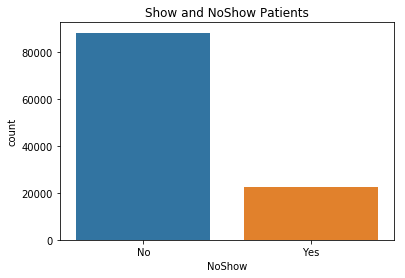

In [34]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show and NoShow Patients")
plt.show()

#### Gender

- Below we can see that out of the 88,000 patients that have turned up, around 57,000 of them are Females and 31,000 are Males.
- Of the 22,500 patients that haven't come for the visit around 15,000 are Females and 7,500 are Males
- The ratio of Females to Males that have turned up looks simiar to those who haven't come for a visit.

Text(0.5,1,'Show and NoShow for Females and Males')

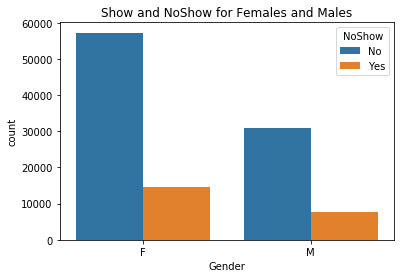

In [35]:
a = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
a.set_title("Show and NoShow for Females and Males")

From the above visualization we can clearly see that 'Female' patients usually have more appointments than 'Male' patients. So, Gender might be an important factor.However lets analyze the other way round that is show and no show breaked by gender in the below viz

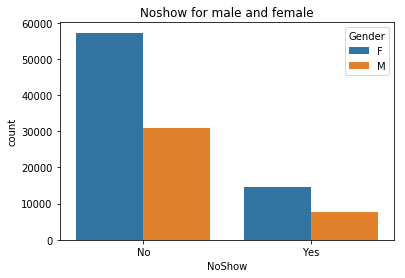

In [36]:
b = sns.countplot(x=df.NoShow, hue=df.Gender, data=df)
b.set_title("Noshow for male and female")
plt.show(b)

*** The ratio of male to female for show and noshow is similar. We might expect gender to play an important role in prediction***

####  Age

We will draw a boxplot for the `Age` feature to check it's distribution.

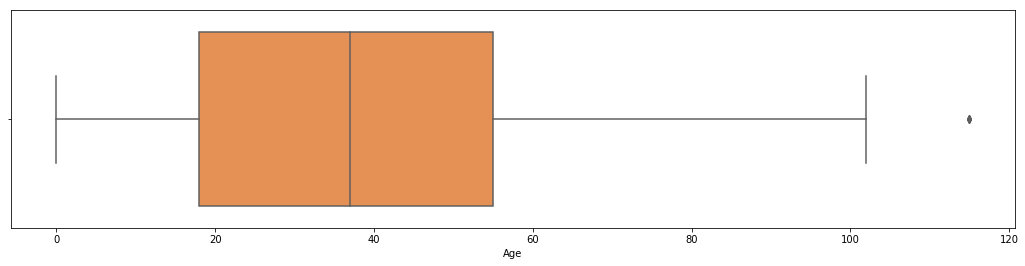

In [37]:
plt.figure(figsize=(18,4))
c = sns.boxplot(x=df.Age,palette="Oranges")

***We can see that the Median Age is around 30 and the IQR is between 18 and 55. The middle 50% of the data lies between 18-55. This also shows that the middle 50% data is mainly due to adults. Age could be an important factor and we will analyze it further plots below***


Below we will plot the number of appointments for patients of different Age.- Adults and minors

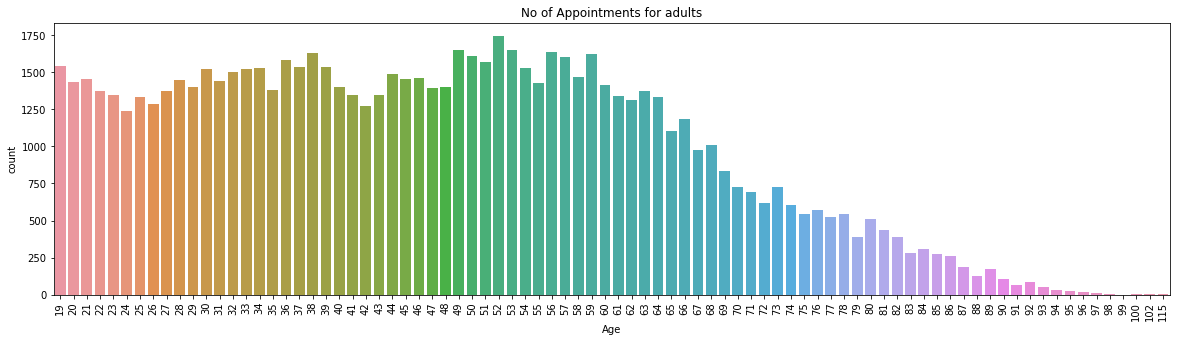

In [38]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age[df.Age>18])
ax.set_title("No of Appointments for adults")
plt.show()

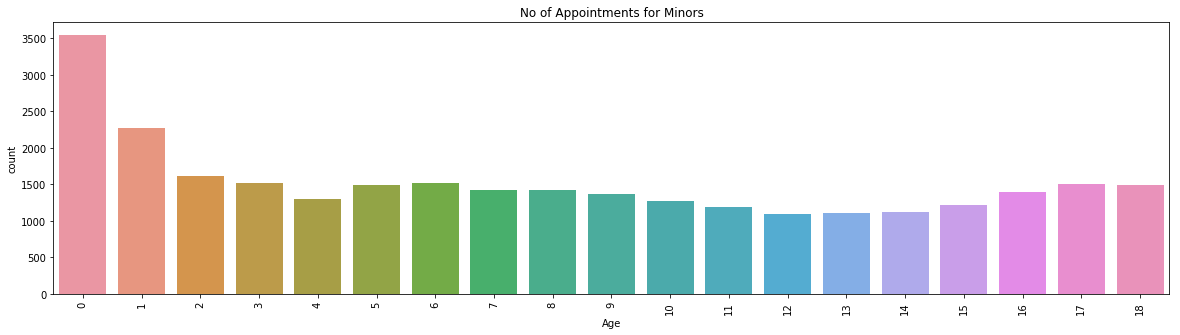

In [39]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age[df.Age<=18])
ax.set_title("No of Appointments for Minors")
plt.show()

From the above countplot we can see that there are peaks for the Infants and then distribution is uniform for minors. For adults the peak is at 52 and the distribution is right skewed. We also infered this from the age distribution.However, the appointments for minors has larger mean value as compared to adults. Hence, appointments for minors are more proactively scheduled. Below we would also analyze the show/no_show rate for different ages.

Below we will plot the Show/NoShow for the patients based on their Age.

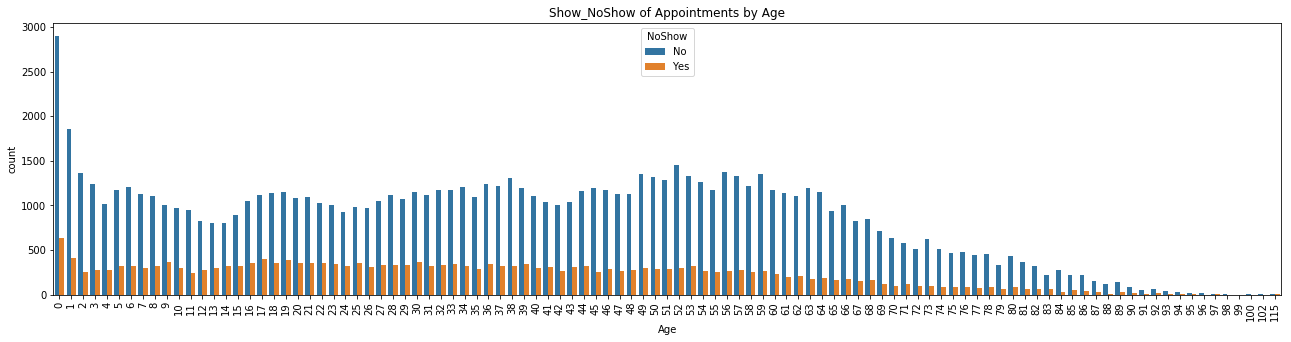

In [40]:
plt.figure(figsize=(22,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age, hue=df.NoShow)
ax.set_title("Show_NoShow of Appointments by Age")
plt.show()

***It looks like ratio of show to noshow is almost for all age groups excluding infants that is age 0 and 1***

Now, let's compute the percentage of patients that show up by different age groups

In [41]:
df_age_ratio = df[df.NoShow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()

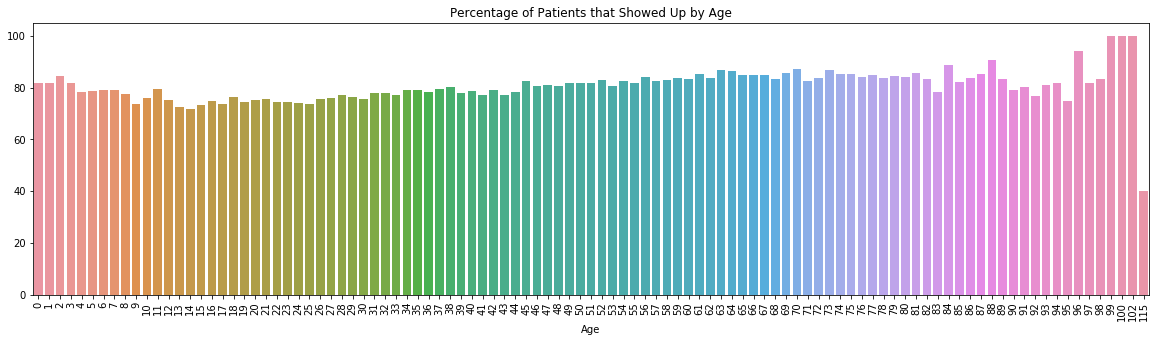

In [42]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio*100)
ax.set_title("Percentage of Patients that Showed Up by Age")
plt.show()

*** So, for most of age groups show rate is ~80%. This is a great insight and age variable could definitely help us in predicting
show.noshow outcome.***

### Neighbourhood

***Let us compute the distribution of various location and analyze how does show or no show differ according to neighorhood***

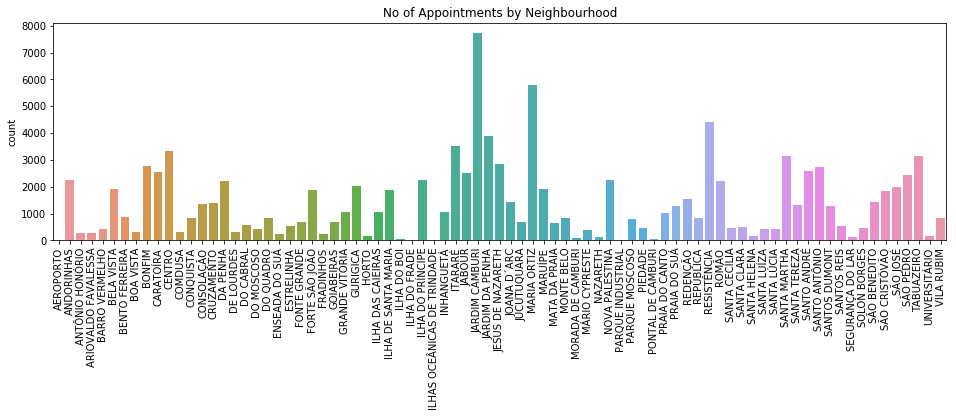

In [43]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

Patients for some of the neighbourhood like Jardim Camburi are quite high as compared to others. 

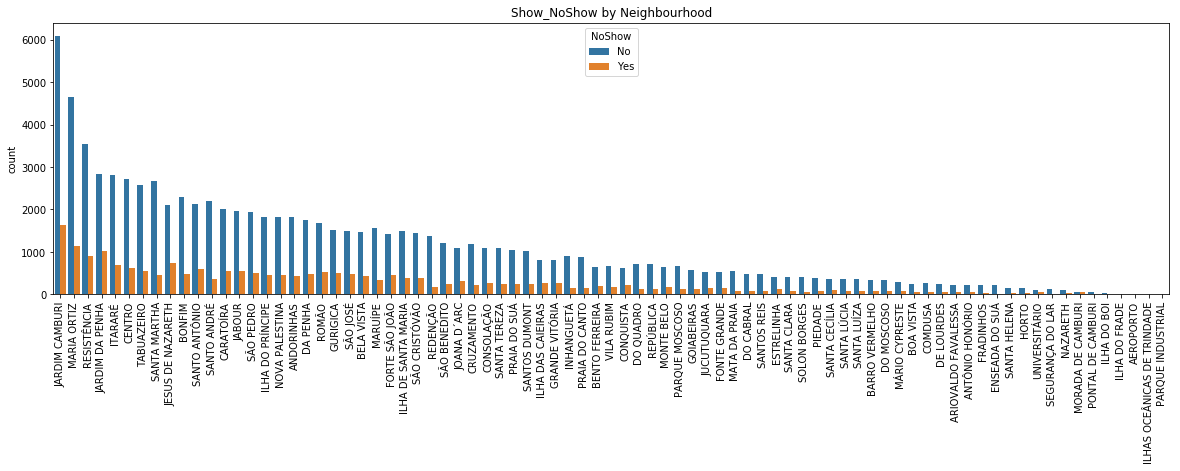

In [44]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood), hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
ax.set_title("Show_NoShow by Neighbourhood")
plt.show()

***The ratio of show to noshow looks similar for all the neighbourhoods. Although some locations have higher appointment rates, the ratio of show to noshow is almost similar for most of the locations.***

In [45]:
df_n_ratio = df[df.NoShow == 'No'].groupby(['Neighbourhood']).size()/df.groupby(['Neighbourhood']).size()

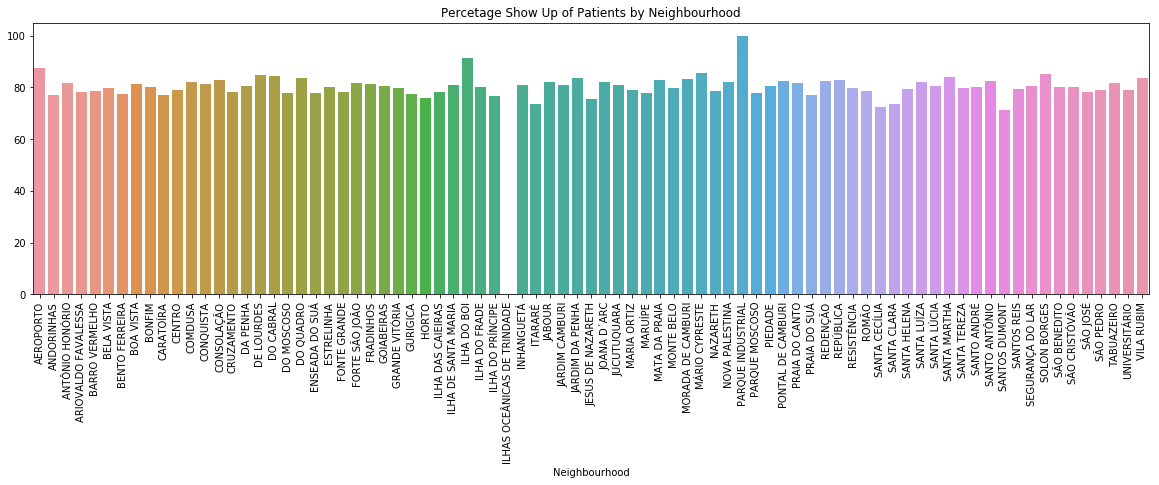

In [46]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.barplot(x=df_n_ratio.index, y=df_n_ratio*100)
ax.set_title("Percetage Show Up of Patients by Neighbourhood")
plt.show()

Most of the location have 80% show rate however one location has 0.This variable might not be of much importance for predicting show-noshow outcome. However, we will check this during model building phase as well

#### Scholarship

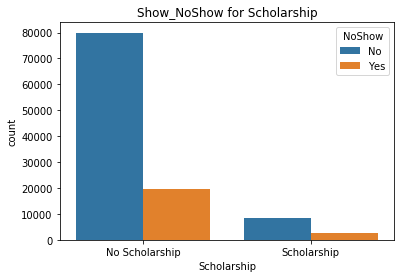

In [47]:
ax = sns.countplot(x=df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("Show_NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

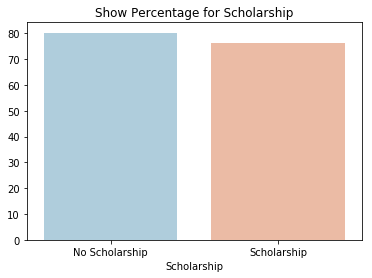

In [48]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio*100, palette="RdBu_r")
ax.set_title("Show Percentage for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that of patients without scholarship around 80% have come for the visit.
- Patients with Scholarship around 75% of them have come for the visit.

So, Scholarship might not play a major role in no_show predition

#### Hypertension

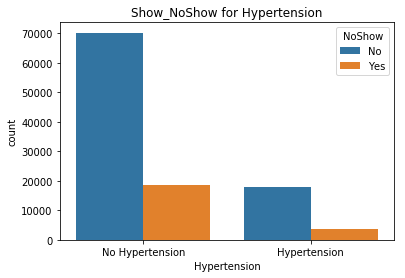

In [49]:
ax = sns.countplot(x=df.Hypertension, hue=df.NoShow, data=df)
ax.set_title("Show_NoShow for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

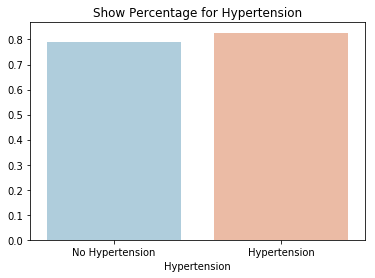

In [50]:
df_h_ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
ax = sns.barplot(x=df_h_ratio.index, y=df_h_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for Hypertension")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- Without hypertension- 78% have come for the visit.
- With Hypertension around 85% of have come for the visit.

So, Hypertension feature could help us in predecting the show-noshow outcome

#### Diabetes

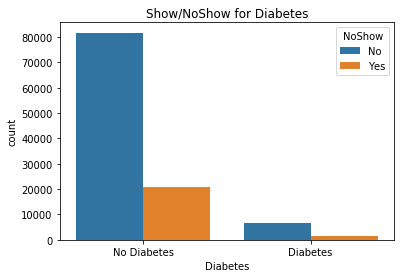

In [51]:
ax = sns.countplot(x=df.Diabetes, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

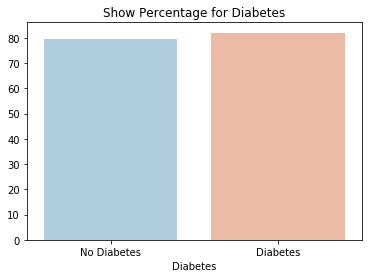

In [52]:
df_d_ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
ax = sns.barplot(x=df_d_ratio.index, y=df_d_ratio*100, palette="RdBu_r")
ax.set_title("Show Percentage for Diabetes")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- Without Diabetes ~ around 80% have come for the visit.
- With Diabetes around 83% of have come for the visit.

So, Diabetes feature could help us in predecting the show-noshow outcome

#### Alcoholism

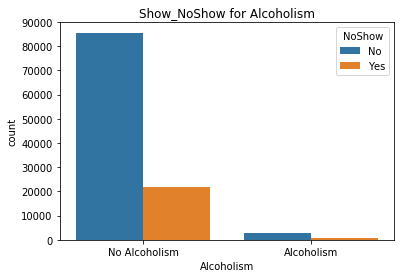

In [53]:
ax = sns.countplot(x=df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("Show_NoShow for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

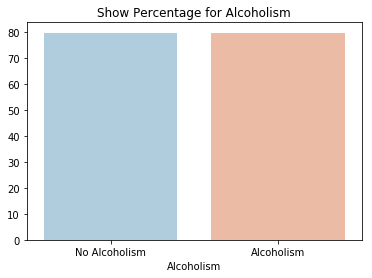

In [54]:
df_a_ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
ax = sns.barplot(x=df_a_ratio.index, y=df_a_ratio*100, palette="RdBu_r")
ax.set_title("Show Percentage for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

***- Without Alcoholism around 80% have come for the visit.
- With Alcoholism around 80% of them have come for the visit.

As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining show_noshow outcome***

#### Handicap

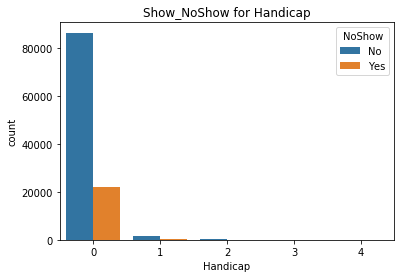

In [55]:
ax = sns.countplot(x=df.Handicap, hue=df.NoShow, data=df)
ax.set_title("Show_NoShow for Handicap")
plt.show()

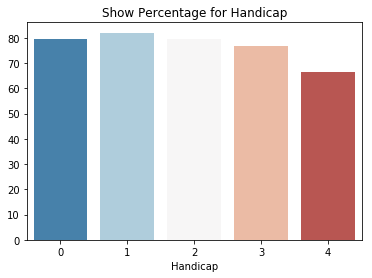

In [56]:
df_ha_ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
ax = sns.barplot(x=df_ha_ratio.index, y=df_ha_ratio*100, palette="RdBu_r")
ax.set_title("Show Percentage for Handicap")
plt.show()

There are around 110,000 patients without Handicap and out of them around 80% have come for the visit.

This feature has a class imbalance and could help us in predicting the required outcome.

#### SMSReceived

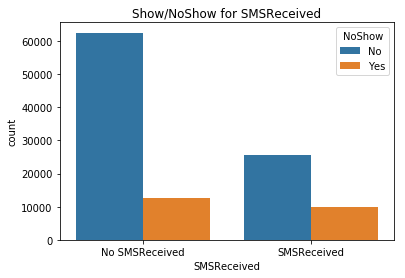

In [57]:
ax = sns.countplot(x=df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

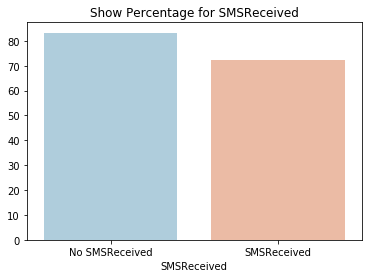

In [58]:
df_s_ratio = df[df.NoShow == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio*100, palette="RdBu_r")
ax.set_title("Show Percentage for SMSReceived")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

- From the above visualization we can see that there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.Out of the 35,500 patients who have received SMS around 72% of them have come for the visit. (This looks opposite to what usually happens. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability.As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determing show_noshow appointment

#### ScheduledDay_Day_of_week

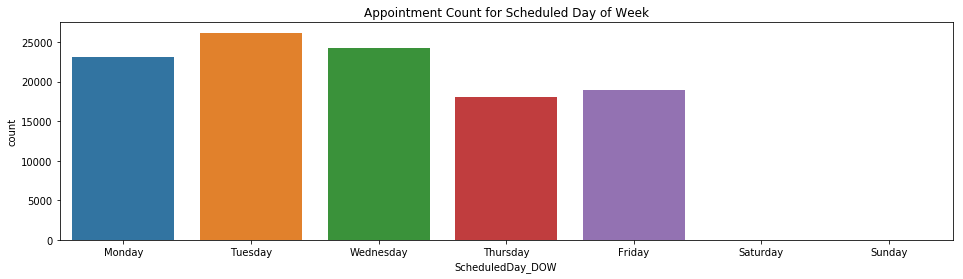

In [59]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDay_DOW, order=week_key)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

- Looks like the call center that takes the appointments doesn't work over the weekends as we do not see any appointments taken on `Saturday` and `Sunday'. The clinic or hospital is closed over the weekend

#### AppointmentDay_DOW

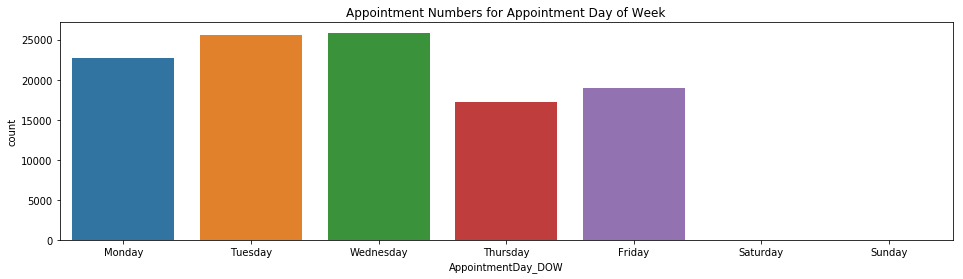

In [60]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, order=week_key)
ax.set_title("Appointment Numbers for Appointment Day of Week")
plt.show()

There looks like a pattern with the appointments from the above visualizations. Also, on weekends there are no appointment

So, AppointmentDay_DOW could help in determining show_noshow outcome

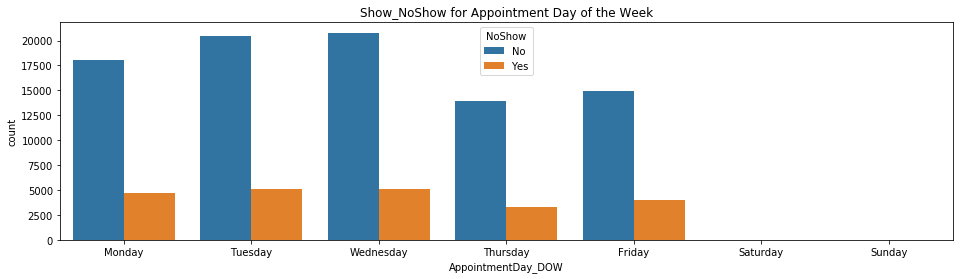

In [61]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW, hue=df.NoShow, order=week_key)
ax.set_title("Show_NoShow for Appointment Day of the Week")
plt.show()

*** Ratio for show_noshow is almost similar across all the days of week. Appointments peaks during tuesday and wednesday ***

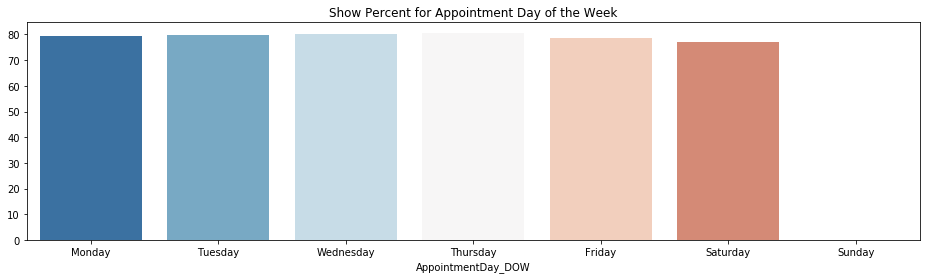

In [62]:
df_a_dow_ratio = df[df.NoShow == 'No'].groupby(['AppointmentDay_DOW']).size()/df.groupby(['AppointmentDay_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio*100, order=week_key, palette="RdBu_r")
ax.set_title("Show Percent for Appointment Day of the Week")
plt.show()

We can observe that on Saturday's the percentage of visits is less. So, AppointmentDay_DOW can help us in predicting the visits by a small number.

#### Waiting_Time

*** In below viz. We will analyze the waiting period of patients.***

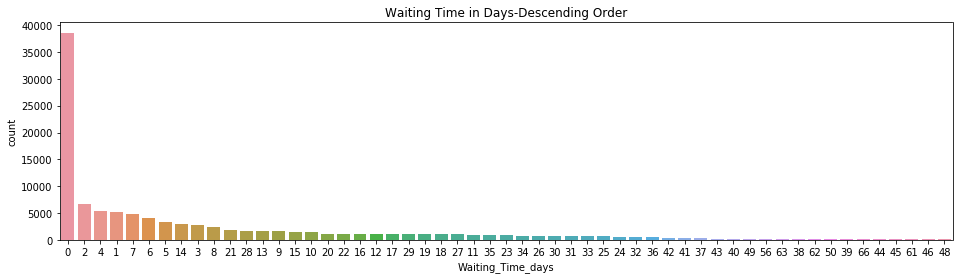

In [63]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index)
ax.set_title("Waiting Time in Days-Descending Order")
plt.show()

Most of the patients book the appointment on the day of visit followed by a waiting period of 1 day, 2 days and 4 days

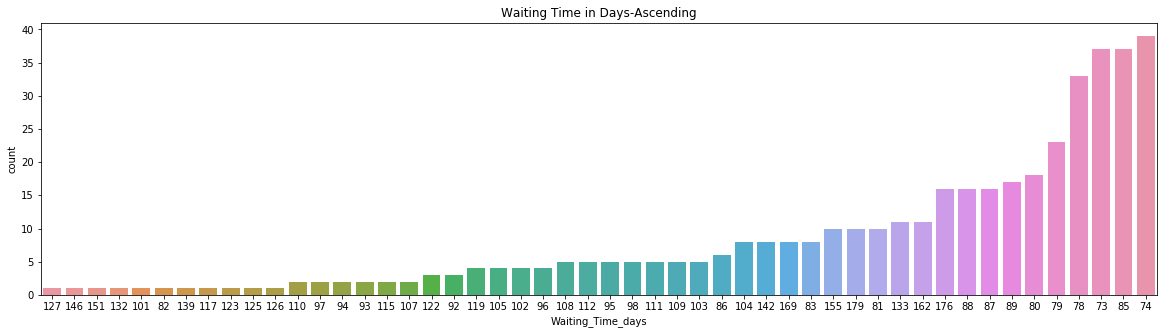

In [64]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:50].index)
ax.set_title("Waiting Time in Days-Ascending")
plt.show()

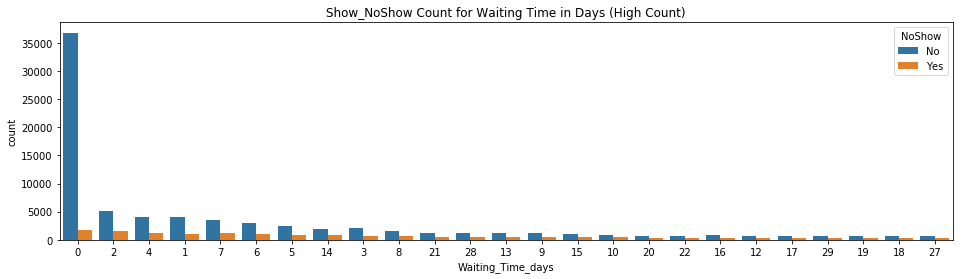

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0


In [65]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts().iloc[:25].index)
ax.set_title("Show_NoShow Count for Waiting Time in Days (High Count)")
plt.show()
df.head(2)

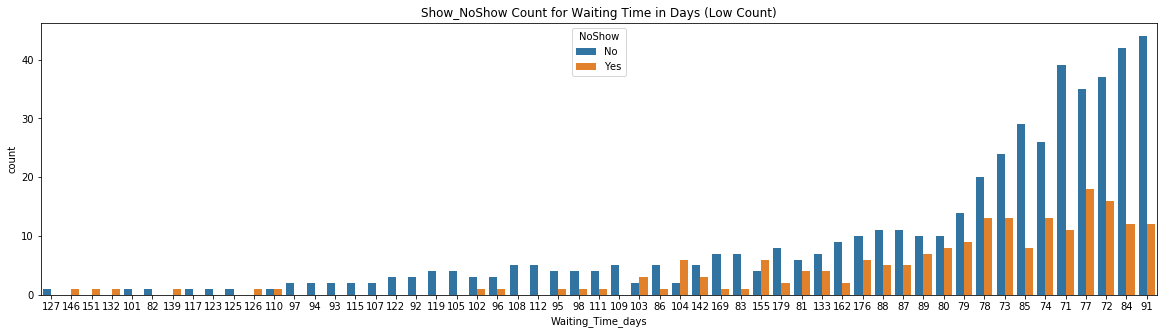

In [66]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.Waiting_Time_days, hue=df.NoShow, order=df.Waiting_Time_days.value_counts(ascending=True).iloc[:55].index)
ax.set_title("Show_NoShow Count for Waiting Time in Days (Low Count)")
plt.show()

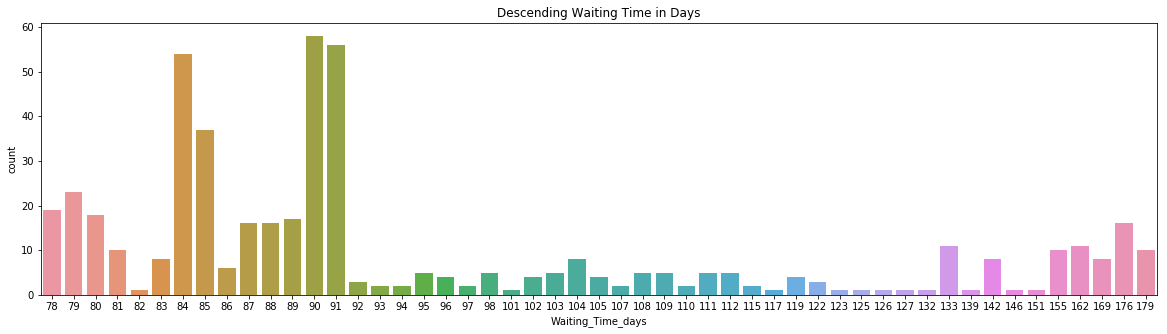

In [67]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:500])
ax.set_title("Descending Waiting Time in Days")
plt.show()

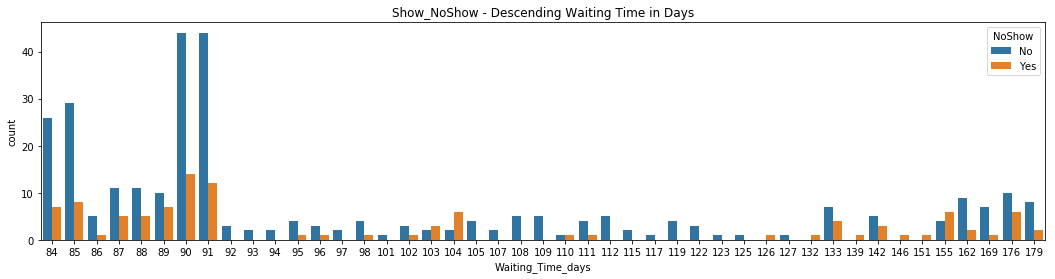

In [68]:
plt.figure(figsize=(18,4))
ax = sns.countplot(x=df[['Waiting_Time_days']].sort_values('Waiting_Time_days', ascending=False).Waiting_Time_days.iloc[:400], hue=df.NoShow)
ax.set_title("Show_NoShow - Descending Waiting Time in Days")
plt.show()

***The below graph clearly helps to analyze the waiting day trend. It also helps to infer that on an average 80% patients come for checkup
irrespective of waiting period***

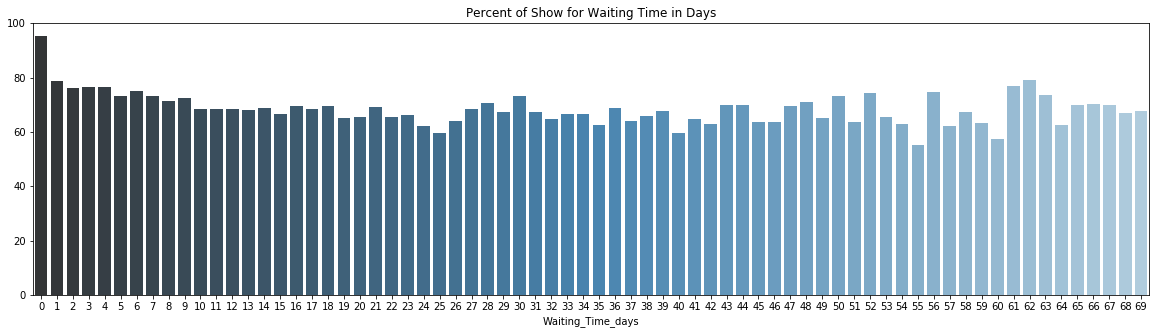

In [69]:
df_w_ratio = df[df.NoShow == 'No'].groupby(['Waiting_Time_days']).size()/df.groupby(['Waiting_Time_days']).size()

plt.figure(figsize=(20,5))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio*100, order=df.Waiting_Time_days.iloc[:70].index, palette="Blues_d")
ax.set_title("Percent of Show for Waiting Time in Days")
plt.show()

As we have a class imbalance for the patients with the Waiting_Time_days, this could help us in better predicting outcome of whether a patient will show or not

### Model Building

In [70]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
Gender                110526 non-null object
ScheduledDay          110526 non-null datetime64[ns]
AppointmentDay        110526 non-null datetime64[ns]
Age                   110526 non-null int64
Neighbourhood         110526 non-null object
Scholarship           110526 non-null object
Hypertension          110526 non-null object
Diabetes              110526 non-null object
Alcoholism            110526 non-null object
Handicap              110526 non-null object
SMSReceived           110526 non-null object
NoShow                110526 non-null object
ScheduledDay_DOW      110526 non-null object
AppointmentDay_DOW    110526 non-null object
Waiting_Time_days     110526 non-null int64
dtypes: datetime64[ns](2), int64(2), object(11)
memory usage: 18.5+ MB


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0


In [71]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
#Neighbourhood
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])
#ScheduledDay_DOW
le = LabelEncoder()
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
#AppointmentDay_DOW
le = LabelEncoder()
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])

#NoShow
le = LabelEncoder()
df['NoShow'] = le.fit_transform(df['NoShow'])

In [72]:
df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

In [73]:
df.sample(n=10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
80646,0,21,36,1,0,0,0,0,0,1,3,3,0,2016,5,5,2016,5,5
94151,0,38,78,0,0,0,0,0,1,0,5,5,49,2016,4,20,2016,6,8
16756,1,53,66,0,1,0,0,0,0,0,4,4,0,2016,5,24,2016,5,24
99958,0,45,59,0,0,0,0,0,1,0,5,3,8,2016,5,25,2016,6,2
73887,0,30,77,0,0,0,0,0,0,0,1,1,0,2016,5,16,2016,5,16
65048,0,40,38,0,0,0,0,0,0,0,1,1,49,2016,3,28,2016,5,16
70062,0,69,77,0,1,0,0,0,0,0,3,3,0,2016,5,19,2016,5,19
31462,0,11,13,1,0,0,0,0,0,0,1,1,0,2016,5,2,2016,5,2
72958,0,41,18,0,0,0,0,0,0,0,0,0,14,2016,5,6,2016,5,20
69856,0,69,59,0,1,0,0,0,0,0,4,4,0,2016,5,31,2016,5,31


In [74]:
# Converting appropriate variables into labels so that we can input them various classification algorithms
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Scholarship'] = le.fit_transform(df['Scholarship'])
df['Hypertension'] = le.fit_transform(df['Hypertension'])
df['Diabetes'] = le.fit_transform(df['Diabetes'])
df['Alcoholism'] = le.fit_transform(df['Alcoholism'])
df['Handicap'] = le.fit_transform(df['Handicap'])
df['SMSReceived'] = le.fit_transform(df['SMSReceived'])
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])
df['Waiting_Time_days'] = le.fit_transform(df['Waiting_Time_days'])
df['ScheduledDay_M'] = le.fit_transform(df['ScheduledDay_M'])
df['ScheduledDay_D'] = le.fit_transform(df['ScheduledDay_D'])
df['AppointmentDay_M'] = le.fit_transform(df['AppointmentDay_M'])
df['AppointmentDay_D'] = le.fit_transform(df['AppointmentDay_D'])

#NoShow
le = LabelEncoder()
df['NoShow'] = le.fit_transform(df['NoShow'])
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_Y,ScheduledDay_M,ScheduledDay_D,AppointmentDay_Y,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,1,0,0,0,0,0,0,0,0,2016,3,28,2016,0,21
1,1,56,39,0,0,0,0,0,0,0,0,0,0,2016,3,28,2016,0,21
2,0,62,45,0,0,0,0,0,0,0,0,0,0,2016,3,28,2016,0,21
3,0,8,54,0,0,0,0,0,0,0,0,0,0,2016,3,28,2016,0,21
4,0,56,39,0,1,1,0,0,0,0,0,0,0,2016,3,28,2016,0,21


In [75]:
#We will drop year column as the data is for 7 months for 2016, hence the variable does not play any role. Retaining all
##other variables after label encoding
X = df.drop(['NoShow','ScheduledDay_Y','AppointmentDay_Y',], axis=1)
y = df['NoShow']
X.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_M,ScheduledDay_D,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,1,0,0,0,0,0,0,0,3,28,0,21
1,1,56,39,0,0,0,0,0,0,0,0,0,3,28,0,21
2,0,62,45,0,0,0,0,0,0,0,0,0,3,28,0,21
3,0,8,54,0,0,0,0,0,0,0,0,0,3,28,0,21
4,0,56,39,0,1,1,0,0,0,0,0,0,3,28,0,21


### Training and test set and scaling variables 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.36707722 -1.08666738  1.62150275 ..., -1.2045064  -0.44328815
   1.08031437]
 [-0.73148758  0.03917217  0.77114316 ...,  1.15268781 -0.44328815
   1.08031437]
 [-0.73148758 -0.43714456 -0.6610414  ..., -0.99021602 -0.44328815
  -0.87469503]
 ..., 
 [ 1.36707722 -1.60628563  0.05505088 ...,  0.40267147 -0.44328815
  -1.01433856]
 [ 1.36707722 -1.43307955 -1.82469136 ...,  0.61696185 -0.44328815
   1.08031437]
 [-0.73148758  0.42888586 -1.82469136 ..., -0.88307083 -0.44328815
   0.2424532 ]]


### Classification model- KNN

In [470]:
#Getting best value for k neighbors
from sklearn.metrics import accuracy_score
for K in range(10):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  73.0783149971 % for K-Value: 1
Accuracy is  78.6768963521 % for K-Value: 2
Accuracy is  75.6297046902 % for K-Value: 3
Accuracy is  78.5574696005 % for K-Value: 4
Accuracy is  76.907209033 % for K-Value: 5
Accuracy is  78.7311812391 % for K-Value: 6
Accuracy is  77.6056745802 % for K-Value: 7
Accuracy is  78.9266068327 % for K-Value: 8
Accuracy is  78.1883323683 % for K-Value: 9
Accuracy is  79.143746381 % for K-Value: 10


***We will use k = 4 as it gives the good accuracy and is neither too low nor too high. Extreme values for k may cause underfitting or overfitting***

In [77]:
#knn classifier
dt_clf = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
dt_clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = dt_clf.predict(X_test)
y_pred2 = dt_clf.predict(X_train)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21086  1053]
 [ 4872   621]]


### Decision tree and random forest classifier with variable importance matrix

In [78]:
#Decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} ----> {:.2f}".format(name, importance))

Feature Importance:

Gender ----> 0.23
Age ----> 0.23
Neighbourhood ----> 0.17
Scholarship ----> 0.08
Hypertension ----> 0.08
Diabetes ----> 0.05
Alcoholism ----> 0.05
Handicap ----> 0.04
SMSReceived ----> 0.02
ScheduledDay_DOW ----> 0.02
AppointmentDay_DOW ----> 0.01
Waiting_Time_days ----> 0.01
ScheduledDay_M ----> 0.01
ScheduledDay_D ----> 0.01
AppointmentDay_M ----> 0.01
AppointmentDay_D ----> 0.01


In [80]:
dt_clf.score(X_test, y_test)

0.72325564562825706

In [81]:
#Testing best hyperparameter for random forest classifier
params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rf_clf = RandomForestClassifier(random_state=0)
clf_grid = GridSearchCV(rf_clf, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X, y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   58.9s finished


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.798065613521


In [82]:
#Random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=5,min_samples_split=2,random_state=0)
rf_clf.fit(X_train, y_train)
print("Importance of features:\n")
for name, importance in zip(X.columns, np.sort(rf_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))


Importance of features:

Gender -- 0.69
Age -- 0.14
Neighbourhood -- 0.06
Scholarship -- 0.05
Hypertension -- 0.01
Diabetes -- 0.01
Alcoholism -- 0.01
Handicap -- 0.00
SMSReceived -- 0.00
ScheduledDay_DOW -- 0.00
AppointmentDay_DOW -- 0.00
Waiting_Time_days -- 0.00
ScheduledDay_M -- 0.00
ScheduledDay_D -- 0.00
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [83]:
rf_clf.score(X_test, y_test)

0.8012087434858135

In [84]:
y_pred = rf_clf.predict(X_test)
#confusion matrix for random forest classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22139     0]
 [ 5493     0]]


### Perform Dimensionality reduction-PCA and visualizing data using logistic regression classifier

In [86]:
#Applying PCA -Dimensionality reduction. Extracting variables that describe most of variance
"""from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
print((explained_variance))"""

'from sklearn.decomposition import PCA\npca = PCA(n_components=None)\nX_train = pca.fit_transform(X_train)\nX_test = pca.fit_transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\nprint((explained_variance))'

***The first three principal components or new independent variables explain most of the variance.We will use these in building the models below***

In [87]:
#Using two PCA variables that explain most of variance
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
print(X_train)

[[ 0.12246555 -1.19745023]
 [ 2.15695215 -0.17447814]
 [-1.15363489  0.5626866 ]
 ..., 
 [ 1.14494487 -1.46053705]
 [ 0.52308808 -1.32342664]
 [ 0.99896821  3.42596662]]


In [94]:
#fitting logistic regression to the training set derived after PCA
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
y_pred = classifier.predict(X_test)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22123    16]
 [ 5488     5]]


***So, we achieve 80% accuracy with logistic regression by using only two independent variables i.e PC1 and PC2. This looks good.***

***let us visualize the results now for training and test sets***

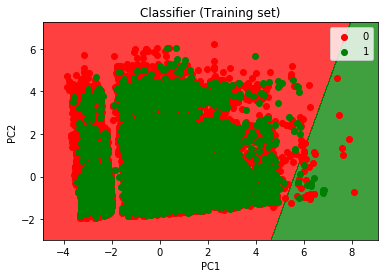

In [96]:
#Visualizing results for training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

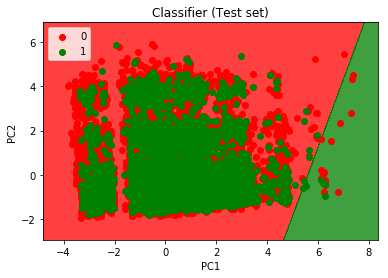

In [97]:
#Visualizing result for test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#### RandomForestClassifier with PCA

In [98]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#****Accuracy is 75%***


[[20175  1964]
 [ 4776   717]]


### Decision tree classifier with PCA

In [99]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Accuracy is 68.5%

[[17224  4915]
 [ 4026  1467]]


From the above models we can infer that a linear classifier logistic regression provides best accuracy after PCA. Decision tree does not have much of affect but the accuracy of random forest reduces.

We cannot completely infer that the linear classifier is best for such a problem as other models could also be improved using hyper parameter tuning and other feature extraction techniques.

### Conclusion

Looking at the variable importance matrix from decision tree and random forest we could see that gender and age are some of the top variables that could help us in predicting show_noshow outcome variable.

References:-
1. Udacity intro to inferential statistics
2. Package seaborn official documentation
3. http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### Limitations:
1. The time frame of data could be improved. Presently we have data only for 7 months.However, if we could get data for 2 or 3 year duration we could draw proper inferences and also train classification models for better accuracy
2. The time frame from date columns is 00. The time of appointment could be an important variable for better prediction of outcome, hence having time entry could be really helpful.
3. A few more demographic variables such as employement_status, education_level, income_level, type_job could help in getting better insights and better machine learning models.
